In [89]:
import numpy as np
import matplotlib.pyplot as pyp
x = np.load("assignment8_X.npy")
y = np.load("assignment8_Y.npy")
x = x.T
y = y.T

alpha = 0.01
n = x.shape[0] # n = 10
t = x.shape[1] # t = 25
#w1 = np.ones((m,n))*0.01
#w2 = np.ones((n,m))*0.01

print(n,t)

def NN1_forward_pass(x,y,w1,w2,w3):
    #print("before forward pass, x")
    #print(x)
    #print("w2")
    #print(w2)
    #print("w1")
    #print(w1)
    #print("y")
    #print(y)
    fwx = w3.dot(w2.dot(w1.dot(x)))
    #print("fwx")
    #print(fwx)
    loss = fwx - y
    #print("loss")
    #print(loss)
    return loss

def NN1_backprop(x,w1,w2,w3,n,m):
    dfdw3 = np.zeros((n,n,m))  # 10x10x25
    dfdw2 = np.zeros((n,m,m))  # 10x25x25
    dfdw1 = np.zeros((n,m,n))  # 10x25x10
    dfdh1 = w3.dot(w2)         # 10x25
    dfdh2 = w3                 # 10x25
    dh1dw1 = np.zeros((m,m,n)) # 25x25x10
    dh2dw2 = np.zeros((m,m,m)) # 25x25x25
    h1 = w1.dot(x)             # 25x1
    h2 = w2.dot(h1)            # 25x1
    #print("In BP, h1", x.shape)
    for i in range(n):
        dfdw3[i][i] = h2
    for i in range(m):
        dh1dw1[i][i] = x
        dh2dw2[i][i] = h1
    for i in range(n):
            for j in range(m):
                dfdw2[i] += dh2dw2[j]*dfdh2[i][j]
                dfdw1[i] += dh1dw1[j]*dfdh1[i][j]
    return dfdw1,dfdw2,dfdw3

def VecXTen(vec,tensor):
    result = np.zeros((tensor.shape[1],tensor.shape[2]))
    for i in range(len(vec)):
        result += vec[i]*tensor[i]
    return result

10 25


Final Loss:  1.7962366226647475


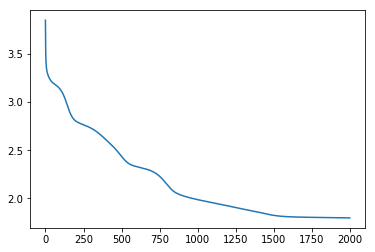

In [91]:
# NN1 with m = 10
m = 10
w1 = np.random.rand(m,n)*0.1
w2 = np.random.rand(m,m)*0.1
w3 = np.random.rand(n,m)*0.1
loss_list = []
for steps in range(2000):
    Gradient_w1 = np.zeros(w1.shape)
    Gradient_w2 = np.zeros(w2.shape)
    Gradient_w3 = np.zeros(w3.shape)
    total_loss = 0
    for col in range(t):
        loss = NN1_forward_pass(x[:,col],y[:,col],w1,w2,w3)
        total_loss += np.linalg.norm(loss)**2
        dfdw1,dfdw2,dfdw3 = NN1_backprop(x[:,col],w1,w2,w3,n,m)
        Gradient_w1 += VecXTen(loss,dfdw1)
        Gradient_w2 += VecXTen(loss,dfdw2)
        Gradient_w3 += VecXTen(loss,dfdw3)
    Gradient_w1 = Gradient_w1 * 2 / t
    Gradient_w2 = Gradient_w2 * 2 / t
    Gradient_w3 = Gradient_w3 * 2 / t
    w1 = w1 - alpha * Gradient_w1
    w2 = w2 - alpha * Gradient_w2
    w3 = w3 - alpha * Gradient_w3
    #print("at iteration ", steps, " loss is ", total_loss/t)
    loss_list.append(total_loss/t)
print("Final Loss: ", total_loss/t)
#print("final W2 * W1: ")
#print(w2.dot(w1))
pyp.plot(loss_list[1:])
pyp.show()
    
    #print("GradientW1: ")
    #print(Gradient_w1)
    #print("loss:")
    #print(loss)
    #print("dfdw1:")
    #print(dfdw1)
    #print("dfdw2:")
    #print(dfdw2)
    

Final Loss:  1.6788260271653126


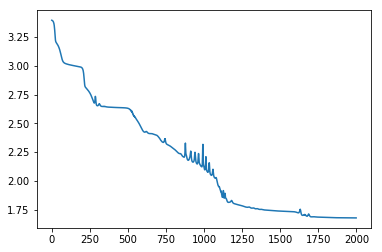

In [92]:
# NN1 with m = 25
m = 25
alpha = 0.05
w1 = np.random.rand(m,n)*0.01
w2 = np.random.rand(m,m)*0.01
w3 = np.random.rand(n,m)*0.01
loss_list = []
for steps in range(2000):
    Gradient_w1 = np.zeros(w1.shape)
    Gradient_w2 = np.zeros(w2.shape)
    Gradient_w3 = np.zeros(w3.shape)
    total_loss = 0
    for col in range(t):
        loss = NN1_forward_pass(x[:,col],y[:,col],w1,w2,w3)
        total_loss += np.linalg.norm(loss)**2
        dfdw1,dfdw2,dfdw3 = NN1_backprop(x[:,col],w1,w2,w3,n,m)
        Gradient_w1 += VecXTen(loss,dfdw1)
        Gradient_w2 += VecXTen(loss,dfdw2)
        Gradient_w3 += VecXTen(loss,dfdw3)
    Gradient_w1 = Gradient_w1 * 2 / t
    Gradient_w2 = Gradient_w2 * 2 / t
    Gradient_w3 = Gradient_w3 * 2 / t
    w1 = w1 - alpha * Gradient_w1
    w2 = w2 - alpha * Gradient_w2
    w3 = w3 - alpha * Gradient_w3
    #print("at iteration ", steps, " loss is ", total_loss/t)
    loss_list.append(total_loss/t)
print("Final Loss: ", total_loss/t)
#print("final W2 * W1: ")
#print(w2.dot(w1))
pyp.plot(loss_list[1:])
pyp.show()
    
    #print("GradientW1: ")
    #print(Gradient_w1)
    #print("loss:")
    #print(loss)
    #print("dfdw1:")
    #print(dfdw1)
    #print("dfdw2:")
    #print(dfdw2)
    

Final Loss:  1.668421258126552


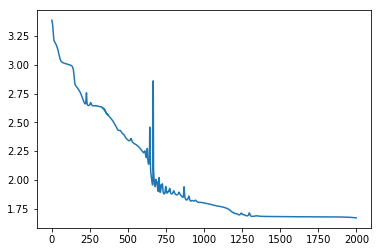

In [95]:
# NN1 with m = 50
m = 50
alpha = 0.05
w1 = np.random.rand(m,n)*0.01
w2 = np.random.rand(m,m)*0.01
w3 = np.random.rand(n,m)*0.01
loss_list = []
for steps in range(2000):
    Gradient_w1 = np.zeros(w1.shape)
    Gradient_w2 = np.zeros(w2.shape)
    Gradient_w3 = np.zeros(w3.shape)
    total_loss = 0
    for col in range(t):
        loss = NN1_forward_pass(x[:,col],y[:,col],w1,w2,w3)
        total_loss += np.linalg.norm(loss)**2
        dfdw1,dfdw2,dfdw3 = NN1_backprop(x[:,col],w1,w2,w3,n,m)
        Gradient_w1 += VecXTen(loss,dfdw1)
        Gradient_w2 += VecXTen(loss,dfdw2)
        Gradient_w3 += VecXTen(loss,dfdw3)
    Gradient_w1 = Gradient_w1 * 2 / t
    Gradient_w2 = Gradient_w2 * 2 / t
    Gradient_w3 = Gradient_w3 * 2 / t
    w1 = w1 - alpha * Gradient_w1
    w2 = w2 - alpha * Gradient_w2
    w3 = w3 - alpha * Gradient_w3
    #print("at iteration ", steps, " loss is ", total_loss/t)
    loss_list.append(total_loss/t)
print("Final Loss: ", total_loss/t)
#print("final W2 * W1: ")
#print(w2.dot(w1))
pyp.plot(loss_list[1:])
pyp.show()
    
    #print("GradientW1: ")
    #print(Gradient_w1)
    #print("loss:")
    #print(loss)
    #print("dfdw1:")
    #print(dfdw1)
    #print("dfdw2:")
    #print(dfdw2)

In [119]:
x = np.load("assignment8_X.npy")
y = np.load("assignment8_Y.npy")
x = x.T
y = y.T

alpha = 0.01
n = x.shape[0] # n = 10
t = x.shape[1] # t = 25
def vec_sigmod(x):
    for i in range(len(x)):
        x[i] = 1/(1+np.exp(-x[i]))
    return x
def sigmod(x):
    return 1/(1+np.exp(-x))
def Sigmod_forward_pass(x,y,w1,w2,w3):
    #print("before forward pass, x")
    #print(x)
    #print("w2")
    #print(w2)
    #print("w1")
    #print(w1)
    #print("y")
    #print(y)
    fwx = w3.dot(vec_sigmod(w2.dot(vec_sigmod(w1.dot(x)))))
    #print("fwx")
    #print(fwx)
    loss = fwx - y
    #print("loss")
    #print(loss)
    return loss

def Sigmod_backprop(x,w1,w2,w3,n,m): # w1 25x10 w2 10x25
    dfdw3 = np.zeros((n,n,m))
    dfdw2 = np.zeros((n,m,m))
    dfdw1 = np.zeros((n,m,n))
    
    # Compute dv2dw2, dv1dw1
    dv2dw2 = np.zeros((m,m,m))
    dv1dw1 = np.zeros((m,m,n))
    h1 = vec_sigmod(w1.dot(x))
    h2 = vec_sigmod(w2.dot(h1))
    for i in range(m):
        dv2dw2[i][i] = h1.T
        dv1dw1[i][i] = x.T
        
    # Compute dfdv2,dfdv1
    dh2dv2 = np.zeros((m,m))    # 25x25
    dh1dv1 = np.zeros((m,m))    # 25x25
    v1 = w1.dot(x) # 25x1
    v2 = w2.dot(vec_sigmod(v1))
    for i in range(m):
        #dh2dv[i][i] = sigmod(v[i])(1-sigmod(v[i]))
        dh2dv2[i][i] = h2[i]*(1-h2[i])
        dh1dv1[i][i] = h1[i]*(1-h1[i])
    dfdv2 = w3.dot(dh2dv2)     # nxm    
    dfdv1 = w3.dot(dh2dv2.dot(w2.dot(dh1dv1)))      # nxm
    
    # Compute dfdw1,dfdw2,dfdw3
    for i in range (n):
        for j in range(m):
            #print(dv2dw2.shape,dfdv2.shape)
            dfdw2[i] += dv2dw2[j]*dfdv2[i][j]
            dfdw1[i] += dv1dw1[j]*dfdv1[i][j]
    for i in range(n):
        dfdw3[i][i] = h2.T
            
    return dfdw1,dfdw2,dfdw3

Final Loss:  0.8272811067483257


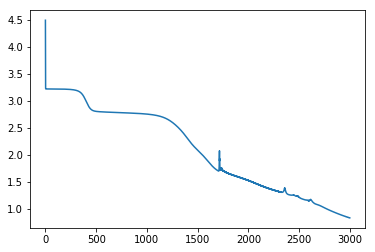

In [80]:
# NN2 with m = 10
alpha = 0.1
m = 10
w1 = np.random.rand(m,n)*0.1 # 10x10
w2 = np.random.rand(m,m)*0.1 # 10x10
w3 = np.random.rand(n,m)*0.1 # 10x10

loss_list = []
for steps in range(3000):
    Gradient_w1 = np.zeros(w1.shape)
    Gradient_w2 = np.zeros(w2.shape)
    Gradient_w3 = np.zeros(w3.shape)
    total_loss = 0
    for col in range(t):
        loss = Sigmod_forward_pass(x[:,col],y[:,col],w1,w2,w3)
        total_loss += np.linalg.norm(loss)**2
        dfdw1,dfdw2,dfdw3 = Sigmod_backprop(x[:,col],w1,w2,w3,n,m)
        Gradient_w1 += VecXTen(loss,dfdw1)
        Gradient_w2 += VecXTen(loss,dfdw2)
        Gradient_w3 += VecXTen(loss,dfdw3)
    Gradient_w1 = Gradient_w1 * 2 / t
    Gradient_w2 = Gradient_w2 * 2 / t
    Gradient_w3 = Gradient_w3 * 2 / t
    w1 = w1 - alpha * Gradient_w1
    w2 = w2 - alpha * Gradient_w2
    w3 = w3 - alpha * Gradient_w3
    #print("at iteration ", steps, " loss is ", total_loss/t)
    loss_list.append(total_loss/t)
print("Final Loss: ", total_loss/t)
#print("final W2 * W1: ")
#print(w2.dot(w1))
pyp.plot(loss_list)
pyp.show()
    #print("GradientW1: ")
    #print(Gradient_w1)
    #print("loss:")
    #print(loss)
    #print("dfdw1:")
    #print(dfdw1)
    #print("dfdw2:")
    #print(dfdw2)
    

Final Loss:  0.6054593372685161


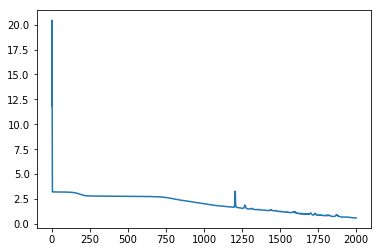

In [112]:
# NN2 with m = 25
alpha = 0.1
m = 25
w1 = np.random.rand(m,n)*0.1 # 10x10
w2 = np.random.rand(m,m)*0.1 # 10x10
w3 = np.random.rand(n,m)*0.1 # 10x10

loss_list = []
for steps in range(2000):
    Gradient_w1 = np.zeros(w1.shape)
    Gradient_w2 = np.zeros(w2.shape)
    Gradient_w3 = np.zeros(w3.shape)
    total_loss = 0
    for col in range(t):
        loss = Sigmod_forward_pass(x[:,col],y[:,col],w1,w2,w3)
        total_loss += np.linalg.norm(loss)**2
        dfdw1,dfdw2,dfdw3 = Sigmod_backprop(x[:,col],w1,w2,w3,n,m)
        Gradient_w1 += VecXTen(loss,dfdw1)
        Gradient_w2 += VecXTen(loss,dfdw2)
        Gradient_w3 += VecXTen(loss,dfdw3)
    Gradient_w1 = Gradient_w1 * 2 / t
    Gradient_w2 = Gradient_w2 * 2 / t
    Gradient_w3 = Gradient_w3 * 2 / t
    w1 = w1 - alpha * Gradient_w1
    w2 = w2 - alpha * Gradient_w2
    w3 = w3 - alpha * Gradient_w3
    #print("at iteration ", steps, " loss is ", total_loss/t)
    loss_list.append(total_loss/t)
print("Final Loss: ", total_loss/t)
#print("final W2 * W1: ")
#print(w2.dot(w1))
pyp.plot(loss_list)
pyp.show()
    #print("GradientW1: ")
    #print(Gradient_w1)
    #print("loss:")
    #print(loss)
    #print("dfdw1:")
    #print(dfdw1)
    #print("dfdw2:")
    #print(dfdw2)

Final Loss:  3.216497794840676.2164977948406766


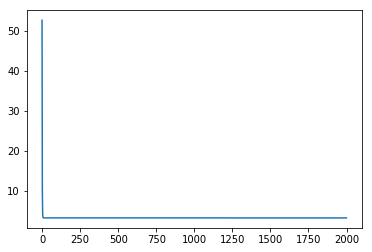

In [120]:
# NN2 with m = 50
alpha = 0.005
m = 50
w1 = np.random.rand(m,n)*0.1 # 10x10
w2 = np.random.rand(m,m)*0.1 # 10x10
w3 = np.random.rand(n,m)*0.1 # 10x10

loss_list = []
for steps in range(2000):
    Gradient_w1 = np.zeros(w1.shape)
    Gradient_w2 = np.zeros(w2.shape)
    Gradient_w3 = np.zeros(w3.shape)
    total_loss = 0
    for col in range(t):
        loss = Sigmod_forward_pass(x[:,col],y[:,col],w1,w2,w3)
        total_loss += np.linalg.norm(loss)**2
        dfdw1,dfdw2,dfdw3 = Sigmod_backprop(x[:,col],w1,w2,w3,n,m)
        Gradient_w1 += VecXTen(loss,dfdw1)
        Gradient_w2 += VecXTen(loss,dfdw2)
        Gradient_w3 += VecXTen(loss,dfdw3)
    Gradient_w1 = Gradient_w1 * 2 / t
    Gradient_w2 = Gradient_w2 * 2 / t
    Gradient_w3 = Gradient_w3 * 2 / t
    w1 = w1 - alpha * Gradient_w1
    w2 = w2 - alpha * Gradient_w2
    w3 = w3 - alpha * Gradient_w3
    print("at iteration ", steps, " loss is ", total_loss/t,end = '\r')
    loss_list.append(total_loss/t)
print("Final Loss: ", total_loss/t)
#print("final W2 * W1: ")
#print(w2.dot(w1))
pyp.plot(loss_list)
pyp.show()
    #print("GradientW1: ")
    #print(Gradient_w1)
    #print("loss:")
    #print(loss)
    #print("dfdw1:")
    #print(dfdw1)
    #print("dfdw2:")
    #print(dfdw2)

[[8.82170745e-03 6.51767792e-03 4.83170777e-04 3.12632509e-03
  3.44929992e-03 6.32485414e-04 6.70754340e-03 9.67863364e-03
  9.74184241e-03 3.15140658e-03]
 [3.42461545e-03 1.16613653e-03 4.42279269e-03 3.18236657e-03
  2.66230012e-03 5.93047398e-03 8.32181071e-04 9.74430721e-04
  9.16559238e-03 5.19474588e-03]
 [3.41637217e-03 7.65376893e-03 4.89664086e-05 1.84454659e-03
  1.94596193e-03 6.51725776e-03 9.95429781e-03 3.39671833e-03
  9.74560035e-03 1.38977420e-03]
 [3.79535977e-03 4.55256780e-03 8.51263717e-03 2.91048980e-03
  2.67674836e-03 1.44121323e-03 7.43007463e-03 6.45583271e-03
  7.45040314e-03 7.36814178e-03]
 [2.03593260e-04 4.66136968e-03 5.07788448e-04 8.60040055e-03
  4.69964345e-03 3.98514680e-04 4.19040449e-03 4.57151144e-03
  6.03586983e-03 9.44339595e-03]
 [7.39933741e-03 6.16435030e-03 1.58942011e-03 9.83257620e-03
  8.60852475e-03 4.56539998e-03 7.17912102e-03 5.49473489e-03
  4.37423798e-03 9.48407957e-03]
 [1.27854065e-03 2.10066329e-03 6.95080975e-04 4.25437902e

at iteration  175  loss is  0
at iteration  176  loss is  0
at iteration  177  loss is  0
at iteration  178  loss is  0
at iteration  179  loss is  0
at iteration  180  loss is  0
at iteration  181  loss is  0
at iteration  182  loss is  0
at iteration  183  loss is  0
at iteration  184  loss is  0
at iteration  185  loss is  0
at iteration  186  loss is  0
at iteration  187  loss is  0
at iteration  188  loss is  0
at iteration  189  loss is  0
at iteration  190  loss is  0
at iteration  191  loss is  0
at iteration  192  loss is  0
at iteration  193  loss is  0
at iteration  194  loss is  0
at iteration  195  loss is  0
at iteration  196  loss is  0
at iteration  197  loss is  0
at iteration  198  loss is  0
at iteration  199  loss is  0
at iteration  200  loss is  0
at iteration  201  loss is  0
at iteration  202  loss is  0
at iteration  203  loss is  0
at iteration  204  loss is  0
at iteration  205  loss is  0
at iteration  206  loss is  0
at iteration  207  loss is  0
at iterati

at iteration  455  loss is  0
at iteration  456  loss is  0
at iteration  457  loss is  0
at iteration  458  loss is  0
at iteration  459  loss is  0
at iteration  460  loss is  0
at iteration  461  loss is  0
at iteration  462  loss is  0
at iteration  463  loss is  0
at iteration  464  loss is  0
at iteration  465  loss is  0
at iteration  466  loss is  0
at iteration  467  loss is  0
at iteration  468  loss is  0
at iteration  469  loss is  0
at iteration  470  loss is  0
at iteration  471  loss is  0
at iteration  472  loss is  0
at iteration  473  loss is  0
at iteration  474  loss is  0
at iteration  475  loss is  0
at iteration  476  loss is  0
at iteration  477  loss is  0
at iteration  478  loss is  0
at iteration  479  loss is  0
at iteration  480  loss is  0
at iteration  481  loss is  0
at iteration  482  loss is  0
at iteration  483  loss is  0
at iteration  484  loss is  0
at iteration  485  loss is  0
at iteration  486  loss is  0
at iteration  487  loss is  0
at iterati

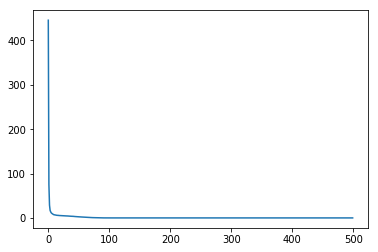

In [117]:
# Linear SVM NN
X = np.load("assignment9_X.npy")
Y = np.load("assignment9_Y.npy")
t = np.shape(X)[1]   # number of sameples 50 (=np.shape(Y))
n = np.shape(X)[0]   # dimension of samples 10
k = 10               # number of classes
L = 0                # loss
total_loss = 0       # total loss
L_list = []
alpha = 0.0012         # learning rate
W = np.random.rand(k,n)*0.01 # weight matrix
print(W)
fix_margin = 1
for steps in range(500):
    dLdW = np.zeros((k,n))    # partial devirative of L with respect to W
    for i in range(t):
        classOfx = Y[i]
        counter = 0
        for j in range(k):
            if j != classOfx:
                L += max(0,W[j].dot(X[:,i])-W[classOfx].dot(X[:,i])+fix_margin)
                #print(X[:,i].shape)
                if(W[j].dot(X[:,i])-W[classOfx].dot(X[:,i])+fix_margin > 0):
                    counter += 1
                total_loss += L
                L = 0
        dLdW[classOfx] += -1 * counter * X[:,i].T
    W = W - alpha * dLdW
    print("at iteration ", steps, " loss is ", total_loss)
    L_list.append(total_loss)
    total_loss = 0
pyp.plot(L_list)
pyp.show()

In [32]:
Y

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8,
       8, 9, 9, 9, 9, 9])